# Sales Forecasting by Linear Regression

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [83]:
df = pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# Data Preprocessing 

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [85]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [86]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Exploratory Data Analysis

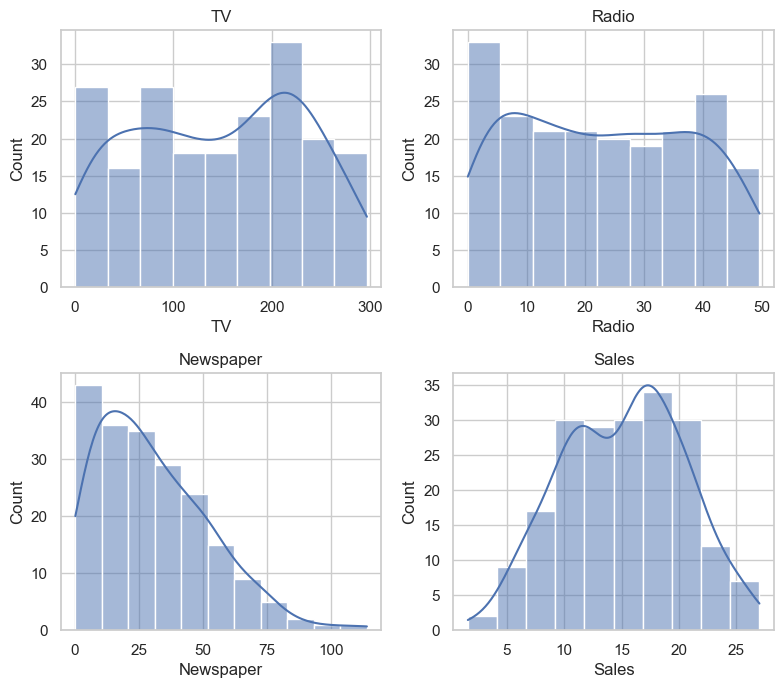

In [87]:
plt.figure(figsize=(8, 10))

columns_to_plot = ['TV', 'Radio', 'Newspaper', 'Sales']

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df[column], kde=True)
    plt.title(column)
    plt.xlabel(column)

plt.tight_layout()
plt.show() 

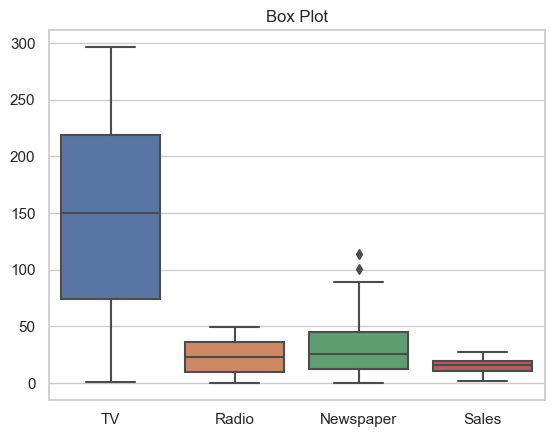

In [88]:
sns.boxplot(data=df)
plt.title('Box Plot')
plt.show()

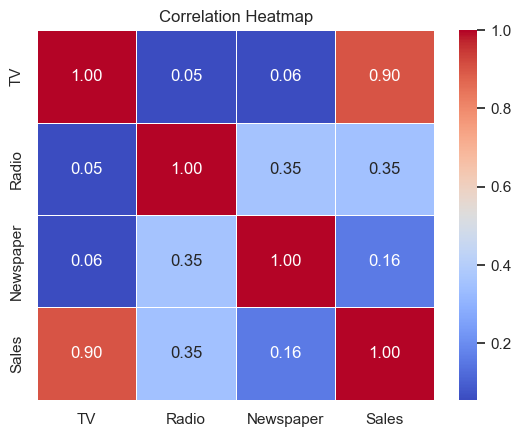

In [89]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

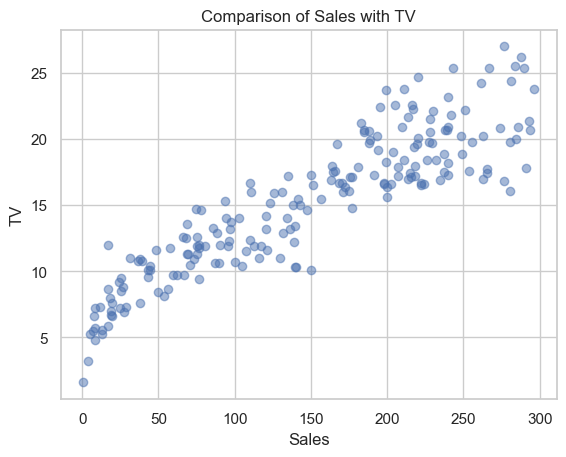

In [90]:
plt.scatter(df["TV"],df["Sales"],alpha=0.5)
plt.xlabel("Sales")
plt.ylabel("TV")
plt.title("Comparison of Sales with TV")
plt.show()

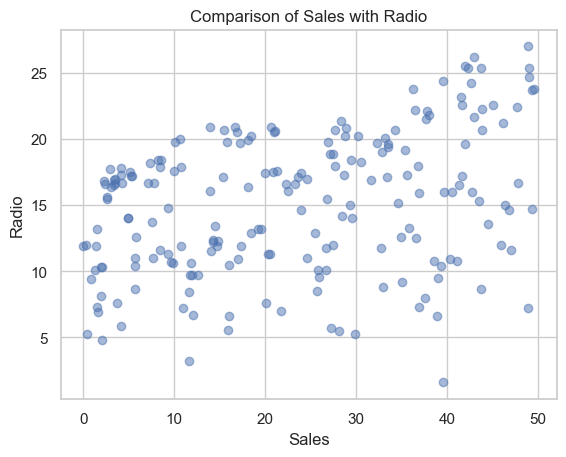

In [91]:
plt.scatter(df["Radio"],df["Sales"],alpha=0.5)
plt.xlabel("Sales")
plt.ylabel("Radio")
plt.title("Comparison of Sales with Radio")
plt.show()

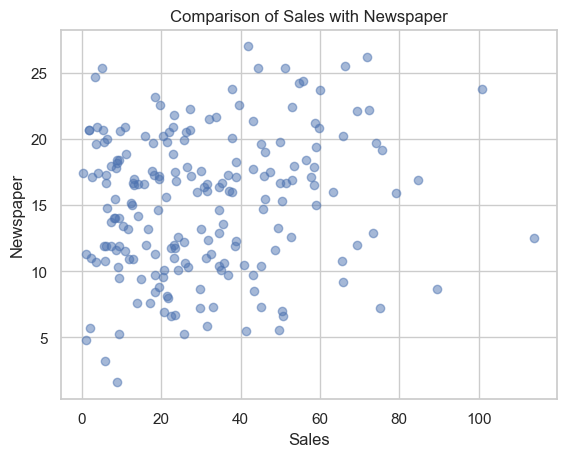

In [92]:
plt.scatter(df["Newspaper"],df["Sales"],alpha=0.5)
plt.xlabel("Sales")
plt.ylabel("Newspaper")
plt.title("Comparison of Sales with Newspaper")
plt.show()

# Model Building

In [98]:
X = df[['TV', 'Newspaper', 'Radio']]
y = df['Sales']

In [99]:
X.head()

,TV,Newspaper,Radio
0,230.1,69.2,37.8
1,44.5,45.1,39.3
2,17.2,69.3,45.9
3,151.5,58.5,41.3
4,180.8,58.4,10.8


In [100]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [101]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=100)

In [102]:
model = LinearRegression()
model.fit(X_train , y_train )
y_pred = model.predict(X_test)

In [103]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 3.3509887213291805
Mean Absolute Error: 1.4149258169276053
R-squared: 0.829669059678084


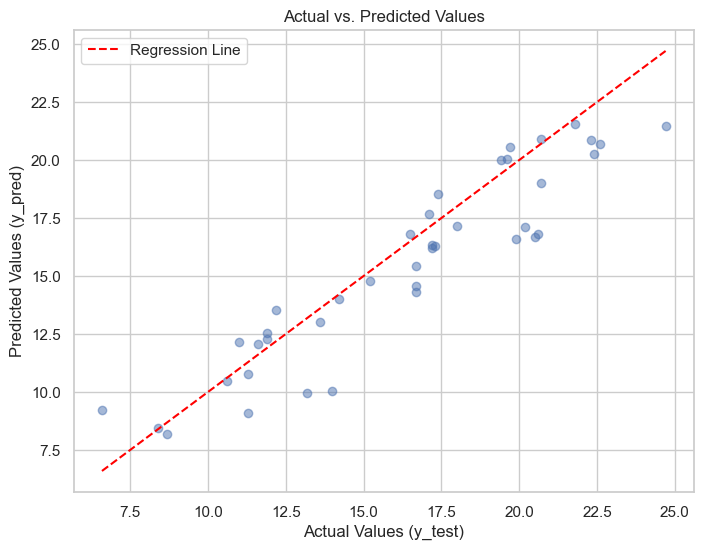

In [105]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
regression_line_x = np.linspace(min(y_test), max(y_test), 100)
regression_line_y = regression_line_x
plt.plot(regression_line_x, regression_line_y, color='red', linestyle='--', label="Regression Line")
plt.legend()
plt.show()


# Conclusion

In our sales prediction project  our Linear Regression model demonstrated promising predictive performance for sales forecasting with a Mean Squared Error (MSE) of 3.35, Mean Absolute Error (MAE) of 1.41, and an R-squared (R2) value of 0.83. While this indicates a good starting point for sales prediction, the model's suitability ultimately depends on the specific project requirements and industry standards.

### Save predicited data to CSV 

In [106]:
df_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predictions.to_csv('sales_prediction.csv', index=False)